In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.4/982.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
#close unclosed polygons
import os

def close_polygon(coords):
    # Compare (x1, y1) to (xn, yn)
    if coords[:2] != coords[-2:]:
        coords += coords[:2]  # Append x1 y1 to end
    return coords

def fix_label_file(path):
    with open(path, "r") as f:
        lines = f.readlines()

    fixed_lines = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 6: continue  # Ignore malformed lines

        class_id = parts[0]
        coords = list(map(float, parts[1:]))

        coords = close_polygon(coords)

        new_line = class_id + " " + " ".join(f"{c:.6f}" for c in coords)
        fixed_lines.append(new_line + "\n")

    with open(path, "w") as f:
        f.writelines(fixed_lines)


In [ ]:
#skip the unlabelled images
import shutil

def prepare_subset(split_dir, new_base_dir):
    image_dir = os.path.join(split_dir, "images")
    label_dir = os.path.join(split_dir, "segment_labels")

    # Target folders
    target_images = os.path.join(new_base_dir, os.path.basename(split_dir), "images")
    target_labels = os.path.join(new_base_dir, os.path.basename(split_dir), "labels")

    os.makedirs(target_images, exist_ok=True)
    os.makedirs(target_labels, exist_ok=True)

    for label_file in os.listdir(label_dir):
        if not label_file.endswith(".txt"): continue

        label_path = os.path.join(label_dir, label_file)
        fix_label_file(label_path)

        # Copy label
        shutil.copy(label_path, os.path.join(target_labels, label_file))

        # Copy image
        image_file = os.path.splitext(label_file)[0] + ".jpg"
        image_path = os.path.join(image_dir, image_file)
        if os.path.exists(image_path):
            shutil.copy(image_path, os.path.join(target_images, image_file))

base_dir = "/content/drive/MyDrive/Crop-and-Weed-Project-1"
new_cleaned_dir = "/content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned"

for split in ["train", "test", "valid"]:
    prepare_subset(os.path.join(base_dir, split), new_cleaned_dir)


In [ ]:
#check if polygons closed...
def check_label_file(label_file_path):
    with open(label_file_path, "r") as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        points = list(map(float, line.strip().split()[1:]))  # skip class ID
        coords = [(points[i], points[i+1]) for i in range(0, len(points), 2)]
        if coords[0] != coords[-1]:
            print(f"❌ Polygon not closed in {label_file_path}, line {i+1}")
        else:
            print(f"✅ Polygon closed in {label_file_path}, line {i+1}")

def check_all_labels(segment_label_folder):
    for file in os.listdir(segment_label_folder):
        if file.endswith(".txt"):
            check_label_file(os.path.join(segment_label_folder, file))
check_all_labels("/content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels")
check_all_labels("/content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/test/labels")
check_all_labels("/content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/valid/labels")


✅ Polygon closed in /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels/agri_0_1009_jpeg.rf.5a8036f016bb1ab122a4bfcb49fa3c95.txt, line 1
✅ Polygon closed in /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels/agri_0_1009_jpeg.rf.d3916e4bf84f7cb749ee6588a4f6741f.txt, line 1
✅ Polygon closed in /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels/agri_0_1017_jpeg.rf.92e77749a4b6b359ee45a76c449566ea.txt, line 1
✅ Polygon closed in /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels/agri_0_1017_jpeg.rf.db2bbbec8e742af5f7a552d880b31189.txt, line 1
✅ Polygon closed in /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels/agri_0_1017_jpeg.rf.e83de060a54421cbae07d9ac2cf7c88c.txt, line 1
✅ Polygon closed in /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels/agri_0_1026_jpeg.rf.af1645c9654d147c92373586a367fdff.txt, line 1
✅ Polygon closed in /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/l

In [ ]:
#check whicch images have error cuz unable to train yoloseg--------------------not needed anymore
import os
import cv2

def validate_yolo_segmentation_dataset(image_dir, label_dir, class_count):
    """
    Validate YOLO Segmentation dataset.

    Args:
    - image_dir: Path to the directory containing images.
    - label_dir: Path to the directory containing the label .txt files.
    - class_count: Total number of classes in the dataset.

    Returns:
    - None. Prints validation results.
    """

    # Iterate through all images in the image directory
    for image_name in os.listdir(image_dir):
        # Only process image files (ignoring other types like .txt)
        if image_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Check if the corresponding label file exists
            label_name = os.path.splitext(image_name)[0] + '.txt'
            label_path = os.path.join(label_dir, label_name)

            if not os.path.exists(label_path):
                print(f"Warning: No label file for {image_name}. Skipping.")
                continue

            # Check if the label file is not empty
            with open(label_path, 'r') as file:
                lines = file.readlines()

                if not lines:
                    print(f"Warning: Empty label file for {image_name}. Skipping.")
                    continue

                for line in lines:
                    values = line.strip().split()

                    # Validate class_id
                    class_id = int(values[0])
                    if class_id < 0 or class_id >= class_count:
                        print(f"Error: Invalid class ID {class_id} in {label_name}.")
                        continue

                    try:
                        coordinates = [float(val) for val in values[1:]]
                    except ValueError:
                        print(f"Error: Non-numeric coordinate in {label_name}.")
                        continue

                    if any(coord < 0 or coord > 1 for coord in coordinates):
                        print(f"Error: Coordinates out of bounds in {label_name}.")
                        continue

                    if len(coordinates) < 6:  # Each point has an x and y (so 2 * n points)
                        print(f"Error: Not enough points for segmentation in {label_name}.")
                        continue

                    if coordinates[0] != coordinates[-2] or coordinates[1] != coordinates[-1]:
                        print(f"Warning: Polygon not closed in {label_name}.")

            image_path = os.path.join(image_dir, image_name)
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Unable to read image {image_name}. Skipping.")
                continue
            height, width = image.shape[:2]
            print(f"Image {image_name}: {width}x{height} - Valid")

    print("Dataset validation completed.")

# Usage
image_dir = '/content/drive/MyDrive/Crop-and-Weed-Project-1/train/images'
label_dir = '/content/drive/MyDrive/Crop-and-Weed-Project-1/train/segment_labels'
class_count = 2  # Number of classes in your dataset

validate_yolo_segmentation_dataset(image_dir, label_dir, class_count)


Image agri_0_1193_jpeg.rf.a060a3e1c2cbb48da2661a3a9199e40c.jpg: 640x640 - Valid
Image agri_0_172_jpeg.rf.bafcf22c2ec17a7bd6274aa367003448.jpg: 640x640 - Valid
Image agri_0_1508_jpeg.rf.717f055998f0b84813198c9d0ad473b3.jpg: 640x640 - Valid
Image agri_0_177_jpeg.rf.dfa79721b77232a2aa552a8470168fd4.jpg: 640x640 - Valid
Image agri_0_1079_jpeg.rf.48ba289b4a3fd248a2f09b9866f9ea9b.jpg: 640x640 - Valid
Image agri_0_1177_jpeg.rf.bb8d8a4d8cafaa817e85291553a0f682.jpg: 640x640 - Valid
Image agri_0_1260_jpeg.rf.b953c6016ce0478837637b7d243ac11c.jpg: 640x640 - Valid
Image agri_0_114_jpeg.rf.695ff97e1df8b44a7e6e5ddfc7c2d232.jpg: 640x640 - Valid
Image agri_0_1361_jpeg.rf.12e8f61fb933fffbee1eee3866234893.jpg: 640x640 - Valid
Image agri_0_1530_jpeg.rf.155ca84623d32ca80c271c21148ca25e.jpg: 640x640 - Valid
Image agri_0_1192_jpeg.rf.99e66e9d32499f6997733d5d72a6a80f.jpg: 640x640 - Valid
Image agri_0_113_jpeg.rf.e28fb5c848f80a2277fd4ee6984d5588.jpg: 640x640 - Valid
Image agri_0_1258_jpeg.rf.bd7198d8b5686fd0cc

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import torch
print(torch.__version__)  # Verify PyTorch version
print(torch.cuda.is_available())  # Verify GPU availability

2.6.0+cu124
True


In [ ]:
#yolov8 seg training..

from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')

model.train(
    data='/content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/data.yaml',
    epochs=50,
    imgsz=640,
    project='/content/drive/MyDrive/yolo-weed-results',
    name='seg-run1',
    task='segment',
    device='0'
)


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/yolo-weed-results, name=seg-run12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

100%|██████████| 755k/755k [00:00<00:00, 97.7MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-seg summary: 151 layers, 3,264,006 parameters, 3,263,990 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 315MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 11.7±26.0 MB/s, size: 94.7 KB)


train: Scanning /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [02:58<00:00,  1.12it/s]

train: New cache created: /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 0.1±0.0 MB/s, size: 68.5 KB)


val: Scanning /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [02:46<00:00,  1.20it/s]

val: New cache created: /content/drive/MyDrive/Crop-and-Weed-Project-1-cleaned/valid/labels.cache


Plotting labels to /content/drive/MyDrive/yolo-weed-results/seg-run12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo-weed-results/seg-run12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.59G      1.413      4.225      3.287      1.655         20        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        200        304    0.00392      0.785      0.166      0.097    0.00381      0.758      0.147     0.0863



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.22G       1.01      2.407      2.422      1.331         16        640: 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


                   all        200        304        0.3      0.342      0.227      0.142      0.309      0.354      0.233      0.139

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.24G      1.013      1.927      2.043      1.325         35        640: 100%|██████████| 13/13 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


                   all        200        304      0.706     0.0487      0.322      0.194       0.74     0.0525      0.352      0.204

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.25G      1.008      1.957      1.983      1.343         24        640: 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]


                   all        200        304      0.412      0.222      0.255      0.136       0.42      0.226      0.279      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.27G       1.04      2.035      1.908      1.386         23        640: 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        200        304      0.431      0.414      0.365      0.193      0.478      0.421      0.384      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50       3.3G      1.081      2.088      1.841      1.385         43        640: 100%|██████████| 13/13 [00:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        200        304      0.375      0.381      0.342      0.169       0.42      0.331      0.307      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.32G      1.075      1.932       1.92      1.399         19        640: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


                   all        200        304      0.289      0.419      0.243        0.1      0.438      0.385      0.296      0.132

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.33G       1.09      2.012      1.807      1.389         22        640: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


                   all        200        304      0.492      0.412      0.362      0.188      0.472      0.387      0.314       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.35G      1.097      1.771      1.637      1.368         26        640: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        304        0.4      0.398      0.344      0.207      0.396      0.394      0.338      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.37G      1.106      1.932      1.678      1.365         23        640: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        304      0.458      0.337      0.331      0.169      0.402      0.293       0.27      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.39G      1.016      1.737      1.689      1.343         20        640: 100%|██████████| 13/13 [00:04<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


                   all        200        304      0.365      0.589      0.445      0.232      0.414      0.475      0.405      0.237

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.41G      1.016      1.708      1.673      1.335         24        640: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        200        304      0.393      0.541      0.407      0.223      0.364       0.35      0.292      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.42G     0.9518      1.623      1.503      1.292         25        640: 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]


                   all        200        304      0.512      0.478      0.437      0.227      0.303      0.334      0.249       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.45G      1.001      1.735      1.457      1.308         21        640: 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


                   all        200        304      0.466      0.501      0.457      0.219      0.518      0.462       0.43      0.197

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.46G     0.9685      1.581      1.392      1.274         31        640: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        200        304      0.688      0.589      0.636       0.36      0.681       0.58       0.62      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.48G     0.9551        1.7      1.532      1.305         20        640: 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        200        304      0.565      0.611      0.525      0.302      0.559      0.591       0.51      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.5G     0.9331      1.676      1.426      1.264         31        640: 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]


                   all        200        304       0.46      0.557      0.456      0.266      0.462      0.558      0.454      0.273

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.52G     0.8645      1.505      1.322      1.252         21        640: 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]


                   all        200        304      0.566       0.59      0.576      0.353      0.556      0.573      0.559       0.33

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.54G     0.9312      1.604       1.36      1.301         38        640: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


                   all        200        304      0.588      0.568      0.588      0.346      0.565      0.583      0.587      0.333

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.56G     0.8983      1.611      1.281      1.265         28        640: 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        200        304      0.517      0.598      0.555      0.349      0.508      0.574      0.535      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.57G      0.884      1.522      1.255      1.252         26        640: 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


                   all        200        304      0.474      0.679      0.528      0.333      0.451       0.68      0.499      0.288

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.59G     0.9253      1.562      1.305      1.287         42        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


                   all        200        304      0.537      0.661      0.545      0.346      0.539      0.666      0.552      0.356

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.61G     0.8562      1.511      1.183      1.197         27        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]


                   all        200        304      0.537      0.528      0.493      0.321       0.53      0.524      0.478      0.296

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.63G      0.871      1.488      1.199      1.197         29        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


                   all        200        304      0.621      0.659      0.623      0.398      0.604      0.669      0.616      0.369

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.64G        0.8      1.389      1.131      1.188         21        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        200        304      0.641      0.713      0.638      0.407       0.64      0.702      0.632      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.67G     0.8489       1.43      1.222      1.246         23        640: 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        200        304      0.672      0.713      0.652      0.427      0.697      0.663      0.625      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.69G     0.8135        1.5      1.208       1.22         19        640: 100%|██████████| 13/13 [00:04<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        200        304       0.73      0.635      0.682      0.441      0.714       0.62      0.654      0.404

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.71G     0.7832      1.346      1.087      1.179         27        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


                   all        200        304       0.65      0.727      0.674      0.424      0.642      0.729      0.658      0.414

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.72G     0.8329      1.473      1.158       1.25         28        640: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]


                   all        200        304      0.657      0.645      0.616      0.364      0.631      0.607      0.557      0.341

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.74G     0.7809       1.36      1.158      1.196         23        640: 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        200        304      0.646      0.667      0.669      0.389      0.618      0.637      0.605      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.76G     0.7254      1.233      1.083      1.167         42        640: 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


                   all        200        304      0.692      0.699      0.714       0.46      0.745      0.634      0.694      0.447

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.78G     0.7667      1.422      1.094      1.236         19        640: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


                   all        200        304      0.745      0.635      0.683      0.445      0.739      0.606      0.647      0.395

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.79G      0.701        1.3      1.022      1.139         18        640: 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        200        304      0.743      0.628      0.658      0.423      0.755      0.618      0.645      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.81G      0.743      1.201      1.011      1.162         35        640: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        200        304       0.71      0.632      0.673       0.42      0.647      0.645      0.631      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.83G     0.7076      1.252     0.9549       1.13         26        640: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        200        304      0.678      0.708      0.699      0.466      0.665      0.685      0.676      0.441

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.85G      0.713      1.329     0.9485      1.129         18        640: 100%|██████████| 13/13 [00:05<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        200        304      0.635      0.682       0.68      0.468      0.635      0.681      0.655      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.87G     0.6899      1.271     0.9388      1.115         24        640: 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


                   all        200        304      0.664      0.664      0.649      0.459      0.659      0.647      0.616      0.415

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.88G     0.6614      1.244     0.8993       1.08         55        640: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        200        304       0.67       0.69      0.659      0.455      0.668      0.644      0.624      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.91G     0.7174      1.375     0.9548      1.169         21        640: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        200        304      0.665      0.678      0.658      0.453      0.664      0.656      0.621      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.92G     0.6441      1.168     0.9086      1.109         20        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        200        304      0.665      0.702      0.655      0.471      0.673      0.651      0.622      0.407


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.96G     0.6686      1.263      1.143      1.193          8        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        200        304      0.699      0.683      0.674       0.46      0.687      0.665      0.633      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.97G     0.6862      1.178     0.9532      1.195         27        640: 100%|██████████| 13/13 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]


                   all        200        304      0.669      0.636      0.606      0.372      0.662      0.627      0.567      0.334

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.99G     0.5516      1.019      0.848      1.114         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


                   all        200        304      0.594      0.659      0.584      0.379      0.602      0.625      0.555      0.334

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.02G     0.5748     0.9639       0.84      1.135         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]


                   all        200        304      0.664      0.714      0.643      0.436      0.647      0.699      0.616       0.39

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.03G     0.5373      1.014     0.8603      1.103         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        200        304      0.755      0.712      0.703       0.48      0.738       0.69      0.676      0.429

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.05G     0.5744      1.087      0.816      1.136         35        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]


                   all        200        304      0.773      0.717      0.718      0.503      0.785      0.668      0.687      0.455

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.07G     0.5631      1.007     0.7868      1.131          8        640: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        200        304      0.757      0.698      0.714      0.506      0.765       0.66      0.683       0.46

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.09G     0.5436     0.9142     0.8204      1.153          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]


                   all        200        304      0.766      0.691      0.698      0.494      0.753      0.675      0.681      0.457

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.1G     0.5115     0.9422     0.7457      1.055          8        640: 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]


                   all        200        304       0.75      0.694      0.704      0.492      0.732      0.672      0.674      0.456

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.12G     0.5092      1.003     0.7604      1.068          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]


                   all        200        304       0.76      0.697      0.705      0.503      0.746      0.682      0.682       0.46

50 epochs completed in 0.123 hours.
Optimizer stripped from /content/drive/MyDrive/yolo-weed-results/seg-run12/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/yolo-weed-results/seg-run12/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/yolo-weed-results/seg-run12/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:00<00:05,  1.20it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:02<00:06,  1.38s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.72s/it]


                   all        200        304      0.757      0.698      0.713      0.505      0.765       0.66      0.682       0.46
                  crop         95        173      0.663      0.717      0.723      0.512      0.686       0.67      0.703      0.469
                  weed        105        131      0.851      0.679      0.702      0.499      0.843      0.649      0.661      0.451
Speed: 0.7ms preprocess, 4.3ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to /content/drive/MyDrive/yolo-weed-results/seg-run12


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7990ac506d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/example.png: 576x640 1 weed, 466.5ms
Speed: 13.9ms preprocess, 466.5ms inference, 36.6ms postprocess per image at shape (1, 3, 576, 640)


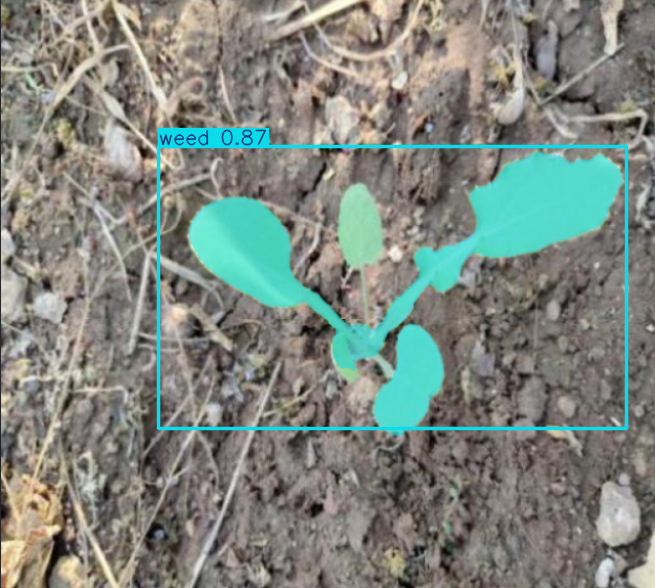

Masks detected: (1, 576, 640)


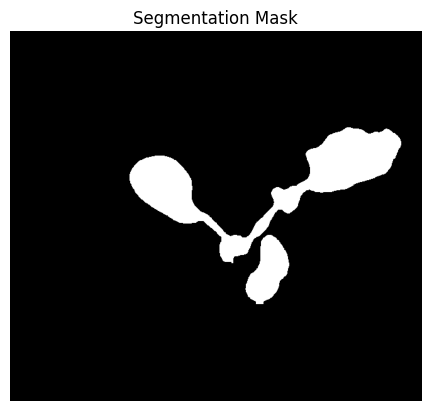

In [ ]:
#sample image to test model
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = YOLO('/content/drive/MyDrive/yolo-weed-results/seg-run12/weights/best.pt')

image_path = '/content/example.png'
img = cv2.imread(image_path)

results = model.predict(image_path, save=False)

if results[0].masks is not None:
    results[0].show()

else:
    print("No detections found in the image.")

if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()  # (N, H, W)
    print("Masks detected:", masks.shape)

    for mask in masks:
        mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))  # Resize to (H, W)

        mask_image = np.zeros_like(img)
        mask_image[mask_resized == 1] = 255
        plt.imshow(cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB))
        plt.title('Segmentation Mask')
        plt.axis('off')
        plt.show()

else:
    print("No segmentation masks found in the results.")





image 1/1 /content/example.png: 576x640 1 weed, 242.6ms
Speed: 5.0ms preprocess, 242.6ms inference, 5.3ms postprocess per image at shape (1, 3, 576, 640)
Masks detected: (1, 576, 640)


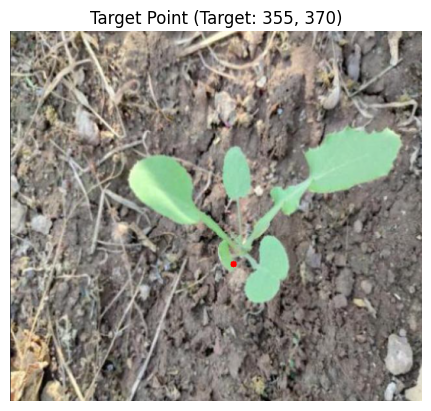

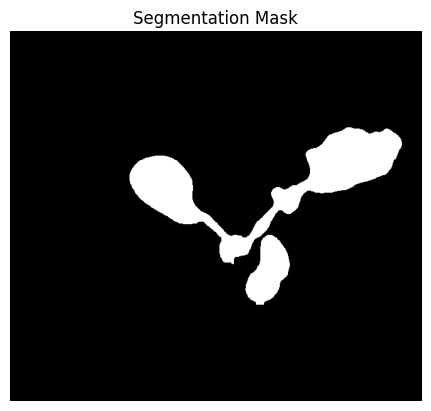

Target XY Coordinates for mask 0: (355, 370)


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np  # Correct import for NumPy
import matplotlib.pyplot as plt

model = YOLO('/content/drive/MyDrive/yolo-weed-results/seg-run12/weights/best.pt')

image_path = '/content/example.png'
img = cv2.imread(image_path)

results = model.predict(image_path, save=False)

if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()  # (N, H, W)
    print("Masks detected:", masks.shape)
    for i, mask in enumerate(masks):
        mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
        mask_image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
        mask_image[mask_resized > 0.5] = 255

        # Find contours
        contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            bottom_points = []
            for point in largest_contour:
                y = point[0][1]
                if y > mask_image.shape[0] * 0.5:
                    bottom_points.append(point[0])

            if bottom_points:
                # Calculate the convergence point
                cx = int(np.median([p[0] for p in bottom_points]))
                cy = int(np.max([p[1] for p in bottom_points]))
            else:
                moments = cv2.moments(mask_image)
                if moments["m00"] != 0:
                    cx = int(moments["m10"] / moments["m00"])
                    cy = int(moments["m01"] / moments["m00"])
                else:
                    cx, cy = img.shape[1] // 2, img.shape[0] // 2  # Center as fallback

            img_with_dot = img.copy()
            cv2.circle(img_with_dot, (cx, cy), 5, (0, 0, 255), -1)  # Red dot (BGR)

            plt.imshow(cv2.cvtColor(img_with_dot, cv2.COLOR_BGR2RGB))
            plt.title(f'Target Point (Target: {cx}, {cy})')
            plt.axis('off')
            plt.show()

            # Display the mask
            plt.imshow(mask_image, cmap='gray')
            plt.title('Segmentation Mask')
            plt.axis('off')
            plt.show()

            print(f"Target XY Coordinates for mask {i}: ({cx}, {cy})")
        else:
            print(f"No contours found for mask {i}")

else:
    print("No detections or segmentation masks found in the image.")


image 1/1 /content/example.png: 576x640 1 weed, 9.9ms
Speed: 3.6ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 640)
Masks detected: (1, 576, 640)


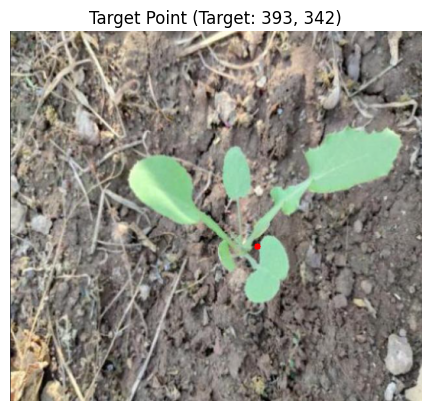

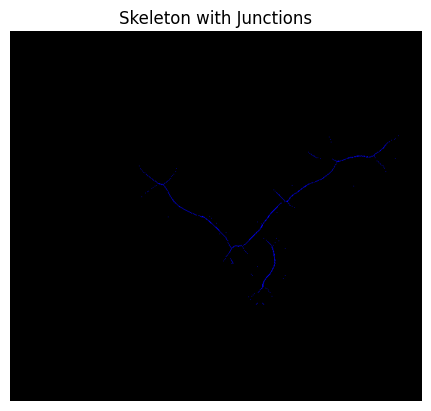

Target XY Coordinates for mask 0: (393, 342)


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Load your trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/yolo-weed-results/seg-run12/weights/best.pt')

# Load the input image
image_path = '/content/example.png'
img = cv2.imread(image_path)

# Perform the prediction using the trained model
results = model.predict(image_path, save=False)

# Check if the model has detected any objects
if results[0].masks is not None:
    # Access the masks
    masks = results[0].masks.data.cpu().numpy()  # (N, H, W)
    print("Masks detected:", masks.shape)

    # Loop through each mask
    for i, mask in enumerate(masks):
        # Resize the mask to match the original image size
        mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

        # Create a binary mask
        mask_image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
        mask_image[mask_resized > 0.5] = 255

        # Skeletonization (thinning)
        size = np.size(mask_image)
        skel = np.zeros(mask_image.shape, np.uint8)
        element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
        done = False

        while not done:
            eroded = cv2.erode(mask_image, element)
            temp = cv2.dilate(eroded, element)
            temp = cv2.subtract(mask_image, temp)
            skel = cv2.bitwise_or(skel, temp)
            mask_image = eroded.copy()
            if cv2.countNonZero(mask_image) == 0:
                done = True

        # Find convergence point by detecting junctions
        kernel = np.ones((3, 3), np.uint8)
        junctions = cv2.dilate(skel, kernel, iterations=1)
        junctions = cv2.erode(junctions, kernel, iterations=1)
        junctions = cv2.bitwise_and(junctions, skel)

        # Get coordinates of junction points
        y, x = np.where(junctions > 0)
        if len(x) > 0:
            # Focus on the lower half for stem convergence
            lower_half_mask = (y > img.shape[0] * 0.5)
            if np.any(lower_half_mask):
                y_lower = y[lower_half_mask]
                x_lower = x[lower_half_mask]
                # Take the median point as the convergence
                cx = int(np.median(x_lower))
                cy = int(np.median(y_lower))
            else:
                # Fallback to overall junction if no lower points
                cx = int(np.median(x))
                cy = int(np.median(y))
        else:
            # Fallback: Centroid of the skeleton
            moments = cv2.moments(skel)
            if moments["m00"] != 0:
                cx = int(moments["m10"] / moments["m00"])
                cy = int(moments["m01"] / moments["m00"])
            else:
                cx, cy = img.shape[1] // 2, img.shape[0] // 2

        # Draw a red dot at the target point
        img_with_dot = img.copy()
        cv2.circle(img_with_dot, (cx, cy), 5, (0, 0, 255), -1)  # Red dot (BGR)

        # Display the original image with the target point
        plt.imshow(cv2.cvtColor(img_with_dot, cv2.COLOR_BGR2RGB))
        plt.title(f'Target Point (Target: {cx}, {cy})')
        plt.axis('off')
        plt.show()

        # Display the skeleton with junctions
        junction_display = cv2.cvtColor(skel, cv2.COLOR_GRAY2BGR)
        junction_display[junctions > 0] = [0, 0, 255]  # Mark junctions in red
        plt.imshow(junction_display)
        plt.title('Skeleton with Junctions')
        plt.axis('off')
        plt.show()

        print(f"Target XY Coordinates for mask {i}: ({cx}, {cy})")

else:
    print("No detections or segmentation masks found in the image.")

In [ ]:
#are, laser intensiy, duration

from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# CONFIG: Real-world pixel-to-mm conversion
PIXEL_TO_MM = 0.2  # 1 pixel = 0.2 mm
PIXEL_AREA_TO_MM2 = PIXEL_TO_MM ** 2  # 0.04 mm² per pixel²

# Laser rules (you can adjust this based on hardware specs)
def get_laser_settings(area_mm2):
    if area_mm2 <= 200:
        return "Low", 0.2
    elif area_mm2 <= 500:
        return "Medium", 0.3
    else:
        return "High", 0.5

model = YOLO('/content/drive/MyDrive/yolo-weed-results/seg-run12/weights/best.pt')

image_path = '/content/example.png'
img = cv2.imread(image_path)

# Predict
results = model.predict(image_path, save=False)

if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()
    print("Masks detected:", masks.shape)

    for i, mask in enumerate(masks):
        mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

        # Binary mask
        mask_image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
        mask_image[mask_resized > 0.5] = 255

        contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)

            # Calculate area
            area_pixels = cv2.contourArea(largest_contour)
            area_mm2 = area_pixels * PIXEL_AREA_TO_MM2
            intensity, duration = get_laser_settings(area_mm2)

            # Get bottom/root point of weed
            bottom_points = [pt[0] for pt in largest_contour if pt[0][1] > mask_image.shape[0] * 0.5]
            if bottom_points:
                cx = int(np.median([p[0] for p in bottom_points]))
                cy = int(np.max([p[1] for p in bottom_points]))
            else:
                # Fallback centroid
                moments = cv2.moments(mask_image)
                if moments["m00"] != 0:
                    cx = int(moments["m10"] / moments["m00"])
                    cy = int(moments["m01"] / moments["m00"])
                else:
                    cx, cy = img.shape[1] // 2, img.shape[0] // 2


            print(f"Mask {i}: Area = {area_mm2:.2f} mm² -> {intensity} Intensity for {duration:.1f}s at ({cx}, {cy})")

        else:
            print(f"No contours found for mask {i}")
else:
    print("No detections or segmentation masks found in the image.")



image 1/1 /content/example.png: 576x640 1 weed, 13.9ms
Speed: 3.9ms preprocess, 13.9ms inference, 2.3ms postprocess per image at shape (1, 3, 576, 640)
Masks detected: (1, 576, 640)
Mask 0: Area = 970.98 mm² -> High Intensity for 0.5s at (355, 370)


In [ ]:
# geo cordinates

from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

model = YOLO('/content/drive/MyDrive/yolo-weed-results/seg-run12/weights/best.pt')

# Load the input image
image_path = '/content/example.png'
img = cv2.imread(image_path)

# Perform the prediction using the trained model
results = model.predict(image_path, save=False)

# Known center GPS coordinate of the image
lat0 = 12.971598  # Example latitude
lon0 = 77.594566  # Example longitude

# Real-world area covered by the image (meters) — update based on camera + altitude
real_width_m = 5     # Width in meters
real_height_m = 4    # Height in meters

# Image dimensions
h, w, _ = img.shape
if results[0].masks is not None:
    # Access the masks
    masks = results[0].masks.data.cpu().numpy()  # (N, H, W)
    print("Masks detected:", masks.shape)

    # Loop through each mask
    for i, mask in enumerate(masks):
        mask_resized = cv2.resize(mask, (w, h), interpolation=cv2.INTER_NEAREST)

        mask_image = np.zeros((h, w), dtype=np.uint8)
        mask_image[mask_resized > 0.5] = 255

        contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            bottom_points = [pt[0] for pt in largest_contour if pt[0][1] > h * 0.5]

            if bottom_points:
                cx = int(np.median([p[0] for p in bottom_points]))
                cy = int(np.max([p[1] for p in bottom_points]))
            else:
                moments = cv2.moments(mask_image)
                if moments["m00"] != 0:
                    cx = int(moments["m10"] / moments["m00"])
                    cy = int(moments["m01"] / moments["m00"])
                else:
                    cx, cy = w // 2, h // 2

            img_with_dot = img.copy()
            cv2.circle(img_with_dot, (cx, cy), 5, (0, 0, 255), -1)

            # Convert pixel coordinates to GPS
            dx = cx - w / 2
            dy = cy - h / 2
            meters_per_pixel_x = real_width_m / w
            meters_per_pixel_y = real_height_m / h
            offset_x_m = dx * meters_per_pixel_x
            offset_y_m = dy * meters_per_pixel_y

            # Convert offset to GPS using geopy
            gps_lat = geodesic(meters=offset_y_m).destination((lat0, lon0), bearing=180).latitude
            gps_lon = geodesic(meters=offset_x_m).destination((lat0, lon0), bearing=90).longitude

            print(f"Mask {i}: Pixel Coordinates = ({cx}, {cy})")
            print(f"Mask {i}: GPS Coordinates = Latitude: {gps_lat:.6f}, Longitude: {gps_lon:.6f}\n")
        else:
            print(f"No contours found for mask {i}")
else:
    print("No detections or segmentation masks found in the image.")



image 1/1 /content/example.png: 576x640 1 weed, 9.8ms
Speed: 3.2ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 640)
Masks detected: (1, 576, 640)
Mask 0: Pixel Coordinates = (355, 370)
Mask 0: GPS Coordinates = Latitude: 12.971593, Longitude: 77.594568

